# Capital One Data Challenge

Workday id: C1029376

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Question 1

<a id="question_1"></a>

## a)  Programmatically download and load into your favorite analytical tool the trip data for September 2015.
<a id="question_1a"></a>

In [7]:
df_raw = pd.read_csv("C:/Users/abhip/OneDrive/Desktop/green_tripdata_2015-09.csv") 
# read data into a pandas dataframe

In [8]:
df_raw.tail(10) # display last 10 rows of our data.

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1494916,1,2015-09-30 23:00:29,2015-09-30 23:20:19,N,1,-73.957939,40.721851,-73.912788,40.780136,1,...,19.0,0.5,0.5,4.05,0.0,NaN,0.3,24.35,1,1.0
1494917,1,2015-09-30 23:01:36,2015-09-30 23:06:14,N,1,-73.941010,40.700401,-73.951485,40.689667,1,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1494918,1,2015-09-30 23:00:17,2015-09-30 23:05:51,N,1,-73.928070,40.824333,-73.915825,40.815277,2,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1494919,1,2015-09-30 23:00:18,2015-09-30 23:06:00,N,1,-73.945869,40.816177,-73.942863,40.829807,1,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1494920,1,2015-09-30 23:01:05,2015-09-30 23:19:14,N,1,-73.996315,40.690693,-73.943321,40.684181,1,...,15.5,0.5,0.5,4.20,0.0,NaN,0.3,21.00,1,1.0
1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,1,-73.925339,40.761776,-73.786606,40.770184,1,...,30.5,0.5,0.5,0.00,0.0,NaN,0.3,31.80,2,1.0
1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,1,-73.974312,40.685802,-73.980591,40.664055,1,...,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,...,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,...,5.0,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0
1494925,1,2015-09-30 23:00:11,2015-09-30 23:05:36,N,1,-73.966110,40.681351,-73.955452,40.691002,1,...,6.5,0.5,0.5,1.00,0.0,NaN,0.3,8.80,1,1.0


In [17]:
df_raw.columns # data columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [9]:
df_raw.info() # data info. ex: datatypes, size etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

## b)  Report how many rows and columns of data you have loaded.
<a id="question_1b"></a>

1. Finding using .shape

In [10]:
row_count = df_raw.shape[0] # 0 for row
column_count = df_raw.shape[1] # 1 for column

In [11]:
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 1494926
Number of columns: 21


1. Finding using length function and axes

In [12]:
total_rows=len(df_raw.axes[0]) # 0 for row
total_cols=len(df_raw.axes[1]) # 1 for column

In [13]:
print("Number of rows:", total_rows)
print("Number of columns:", total_cols)

Number of rows: 1494926
Number of columns: 21


# Question 2
<a id="question_2"></a>

## a) Plot a histogram of the number of the trip distance (“Trip Distance”).
<a id="question_2a"></a>

In [18]:
df_raw['Trip_distance'].head()

0    0.00
1    0.00
2    0.59
3    0.74
4    0.61
Name: Trip_distance, dtype: float64

In [19]:
minimum_trip_distance = df_raw['Trip_distance'].min() # minimum trip distance
maximum_trip_distance = df_raw['Trip_distance'].max() # maximum trip distance

In [20]:
print("Minimum trip distance:", minimum_trip_distance, "miles")
print("Maximum trip distance:", maximum_trip_distance, "miles")

Minimum trip distance: 0.0 miles
Maximum trip distance: 603.1 miles


In [21]:
trip_distance_value_count = df_raw['Trip_distance'].value_counts() # trip distance value count
trip_distance_value_count.head()

0.0    20592
1.0    16735
0.9    16699
0.8    16152
1.1    16070
Name: Trip_distance, dtype: int64

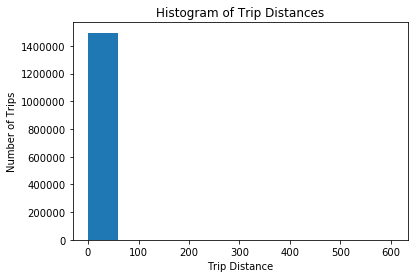

In [22]:
# Plotting the histogram A:
_ = plt.hist(df_raw['Trip_distance'])
_ = plt.title('Histogram of Trip Distances')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

Histogram B Note: Filtered on rides with trip distance("Trip_Distance") less than 25miles, because of higher frequency. 
The data is then binned( The original data values which fall in a given small interval, a bin, are replaced by a value representative of that interval, often the central value) into 25 evenly spaced intervals.

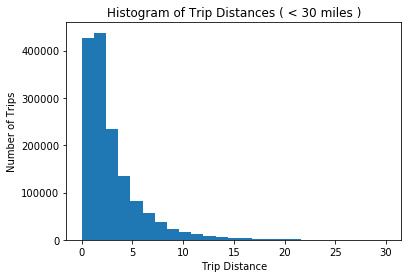

In [24]:
# This is Histogram B
_ = plt.hist(df_raw['Trip_distance'][df_raw['Trip_distance']< 30],bins = 25)
_ = plt.title('Histogram of Trip Distances ( < 30 miles )')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

## b) Report any structure you find and any hypotheses you have about that structure.
<a id="question_2b"></a>

Shape of the above histograms: Skewed right. The histogram A is just one tall bar, whereas the histogram B is skewed right. We can see on the right side there are only a fractional amount of trips when compared to the trips on the left side. Most of the trips were within the 0-5 mile range. A few trips were within the 5-10 mile range, and a handful were >10 mile

# Question 3
<a id="question_3"></a>

## a)  Report mean and median trip distance grouped by hour of day.
<a id="question_3a"></a>

In [26]:
# we're stripping the hour field from the pickup_datetime field to create a new field named "pickup_hour"
df_raw['pickup'] = df_raw['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_raw['pickup_hour'] = df_raw['pickup'].apply(lambda x: x.hour) # this is a new field for holding the pickup_hour.

In [27]:
# we're stripping the hour field from the dropoff_datetime field to create a new field named "dropoff_hour"
df_raw['dropoff'] = df_raw['Lpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_raw['dropoff_hour'] = df_raw['dropoff'].apply(lambda x: x.hour)# this is a new field for holding the dropoff_hour.

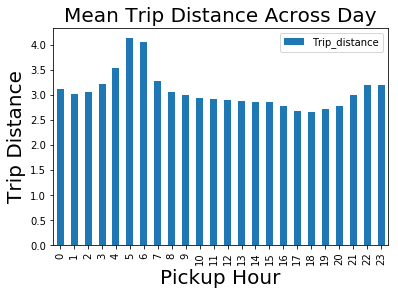

In [31]:
df_raw[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean Trip Distance Across Day', fontsize = 20)
plt.xlabel('Pickup Hour', fontsize = 20)
plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

##### Findings: Looks like the average trip distance covered by the "Green" cabs is relatively higher during the early hours( 4-7 AM).

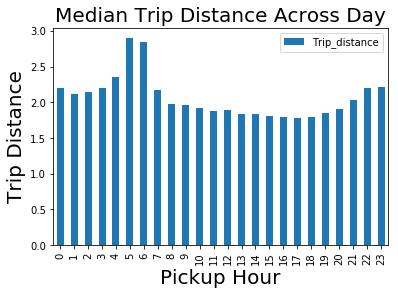

In [32]:
df_raw[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median Trip Distance Across Day', fontsize = 20)
plt.xlabel('Pickup Hour', fontsize = 20)
plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

#### Findings:  Looks like the median trip distance covered by the "Green" cabs is relatively lower at midnight(0-4 AM)  when compared to the trips covered immediately after the sunrise(6-8 AM)

In [38]:
df_raw['lpep_pickup_datetime'] = pd.to_datetime(df_raw.lpep_pickup_datetime) # convert pickup_datetime to datetime object
df_raw.loc[:, 'day_of_week'] = df_raw['lpep_pickup_datetime'].dt.dayofweek # extract the day of week from pickup_date

#### What is the below analysis for?
Great! We've already plotted the mean/median trip distance across day, but it'd interesting to see how the trip
average trip distance changes across week. So, let's go ahead and plot the data below

#### Line-plots
* Simple lineplots can explain how the trip distance is changing with time for different days of week
* pretty easy to interpret.

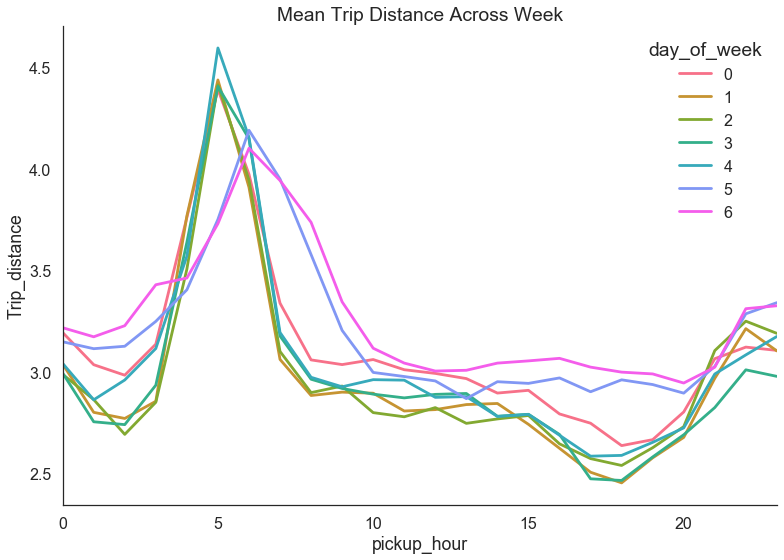

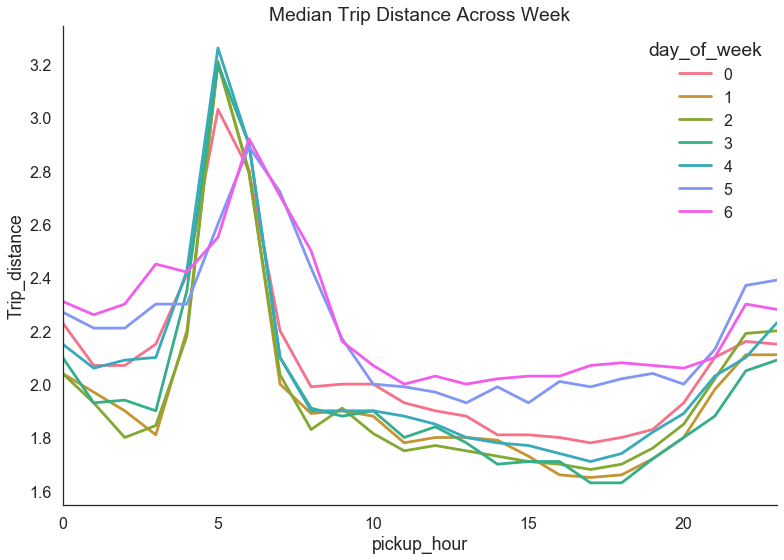

In [39]:
# code block for mean trip distance
summary_wdays_avg_duration = pd.DataFrame(df_raw.groupby(['day_of_week','pickup_hour'])['Trip_distance'].mean()) 
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="pickup_hour", unit = "unit", condition="day_of_week", value="Trip_distance")
sns.despine(bottom = False)
_ = plt.title('Mean Trip Distance Across Week')
plt.show()

# code block for median trip distance
summary_wdays_avg_duration = pd.DataFrame(df_raw.groupby(['day_of_week','pickup_hour'])['Trip_distance'].median())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="pickup_hour", unit = "unit", condition="day_of_week", value="Trip_distance")
sns.despine(bottom = False)
_ = plt.title('Median Trip Distance Across Week')
plt.show()

#### Findings -

Its clear from the above plots that on day 1, that is Monday and day 2 that is Tuesday, 
the trip duration is very less than all the weekdays and weekends at 5 AM to 15 AM time.
See this, on Saturday(day 6) around midnight, the rides are taking far more than usual time, 
this is obvious through now verified using given data


## b) We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.
<a id="question_3b"></a>

In [40]:
# this a helper function to identify whether or not the pickup/dropoff took place at an airport.
def which_nyairport(row):
    if (
        ((row['Pickup_longitude'] < -73.750296) & (row['Pickup_longitude'] > -73.821884) & # we got this directions from google maps
       (row['Pickup_latitude'] < 40.666467) & (row['Pickup_latitude']>40.646677)) |  
        (
       (row['Dropoff_longitude'] < -73.750296) & (row['Dropoff_longitude'] > -73.821884) &
       (row['Dropoff_latitude'] < 40.666467) & (row['Dropoff_latitude']>40.646677)) ):
        
        return 'JFK' # John F. Kennedy International Airport
    
    if (
        ((row['Pickup_longitude'] < -73.865387) & (row['Pickup_longitude'] > -73.884547) & # long and lat from google maps
       (row['Pickup_latitude'] < 40.773098) & (row['Pickup_latitude']>40.767550)) | 
        (
       (row['Dropoff_longitude'] < -73.865387) & (row['Dropoff_longitude'] > -73.884547) &
       (row['Dropoff_latitude'] < 40.773098) & (row['Dropoff_latitude']>40.767550)) ):
        
        return 'LAG' # LaGuardia Airport
    else:
        return 'NOT' # Not an Airport pickup/dropoff

In [41]:
df_raw['Airport'] = df_raw.apply(which_nyairport, axis=1) 
# this is to create a new field in the dataframe based on the helper function written above.

In [42]:
df_raw['Airport'].value_counts() # what's the distribution of the rides. 

NOT    1485010
LAG       5216
JFK       4700
Name: Airport, dtype: int64

In [43]:
print('average fair for airport trips',df_raw[df_raw['Airport']!= 'NOT']['Fare_amount'].mean()) #average fare
print('number of trips satisfying the criteria:',df_raw[df_raw['Airport']!='NOT']['Fare_amount'].shape[0])

average fair for airport trips 26.628824122630096
number of trips satisfying the criteria: 9916


In [44]:
print('average fair for non-airport trips',df_raw[df_raw['Airport']=='NOT']['Fare_amount'].mean()) #average fare

average fair for non-airport trips 12.449142207796637


In [45]:
df_raw_airports = df_raw[df_raw['Airport']!= 'NOT'] # display the non-aiport data.
display_data(df_raw_airports.head())

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,day_of_week,Airport
128,2,2015-09-01 00:12:14,2015-09-01 00:13:05,N,1,-73.845749,40.754173,-73.804893,40.666157,1,8.64,...,NaN,0.3,25.8,2,1.0,2015-09-01 00:12:14,0,2015-09-01 00:13:05,0,1,JFK
209,2,2015-09-01 00:06:14,2015-09-01 00:13:14,N,1,-73.844925,40.754948,-73.866318,40.767796,1,3.16,...,NaN,0.3,11.8,2,1.0,2015-09-01 00:06:14,0,2015-09-01 00:13:14,0,1,LAG
411,2,2015-09-01 00:18:43,2015-09-01 00:32:07,N,1,-73.830002,40.713772,-73.753967,40.656746,1,7.28,...,NaN,0.3,22.8,2,1.0,2015-09-01 00:18:43,0,2015-09-01 00:32:07,0,1,JFK
613,2,2015-09-01 00:44:56,2015-09-01 00:52:31,N,1,-73.825836,40.764244,-73.866325,40.771423,6,3.12,...,NaN,0.3,12.3,2,1.0,2015-09-01 00:44:56,0,2015-09-01 00:52:31,0,1,LAG
653,2,2015-09-01 00:34:12,2015-09-01 00:40:14,N,1,-73.845688,40.754768,-73.866310,40.767639,1,3.12,...,NaN,0.3,11.8,2,1.0,2015-09-01 00:34:12,0,2015-09-01 00:40:14,0,1,LAG


#### point-plots

* Simple point plots can explain how the average fare is changing with different days of week at JFK and LAG
* very easy to interpret


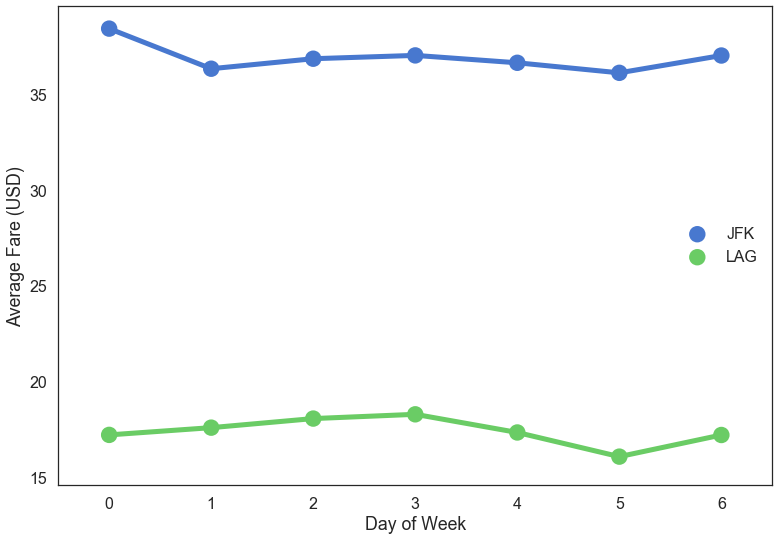

In [46]:
grouped_df = df_raw_airports.groupby(['day_of_week', 'Airport'])['Fare_amount'].aggregate(np.mean).reset_index()
# plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.day_of_week.values, grouped_df.Fare_amount.values, grouped_df.Airport.values, alpha=0.8)
plt.ylabel('Average Fare (USD)')
plt.xlabel('Day of Week')
plt.xticks(rotation='horizontal')
plt.show()

# This plot is to identify the average fare across week.

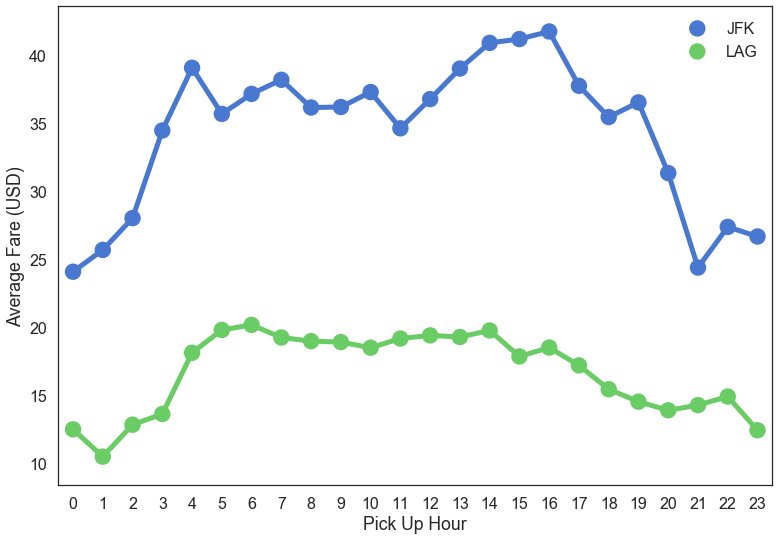

In [47]:
grouped_df = df_raw_airports.groupby(['pickup_hour', 'Airport'])['Fare_amount'].aggregate(np.mean).reset_index()
# plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.pickup_hour.values, grouped_df.Fare_amount.values, grouped_df.Airport.values, alpha=0.8)
plt.ylabel('Average Fare (USD)')
plt.xlabel('Pick Up Hour')
plt.xticks(rotation='horizontal')
plt.show()

# This plot is to identify the average fare across day.

#### Findings: 

Its clear from the above pointplots that the trips to/from JFK have almost 2x the average fare of that of LAG.
Also, on day 0, that is Sunday and day 6 that is Saturday, the average fare is higher than all the weekdays.
It looks like the average fare surged in the afternoon, and plummeted by a huge margin later in the day.

# Question 4
<a id="question_4"></a>

## a) Build a derived variable for tip as a percentage of the total fare.
<a id="question_4a"></a>

In [52]:
df_raw.columns # column info

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'pickup', 'pickup_hour',
       'dropoff', 'dropoff_hour', 'day_of_week', 'Airport', 'pick_lat_new',
       'drop_lat_new', 'pick_lon_new', 'drop_lon_new'],
      dtype='object')

In [53]:
df_raw['tip_percent'] = df_raw['Tip_amount']/df_raw['Total_amount'] # calculate tip percentage 
df_raw['tip_percent'] = df_raw['tip_percent'].apply(lambda x: x * 100) # multiply by 100 to get the %

Great! Now, let's do some analysis on the tip data.
Below is the analysis on average tip across day.

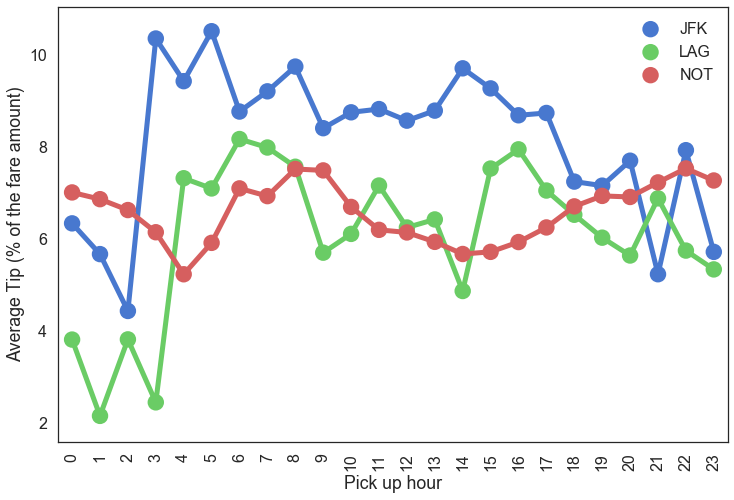

In [54]:
grouped_df = df_raw.groupby(['pickup_hour', 'Airport'])['tip_percent'].aggregate(np.mean).reset_index() #average tip
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.pickup_hour.values, grouped_df.tip_percent.values, grouped_df.Airport.values, alpha=0.8)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()

#### Findings: 
    
Great! Didn't we see this coming? Maybe? No? Okay. The average tip is more for the trips from/to JFK, because the
average fare was relatively higher when compared to LAG or non-aiport rides.

#### Vendor-level Tip Analysis.

1 - Vendor 1 ;
2 - Vendor 2

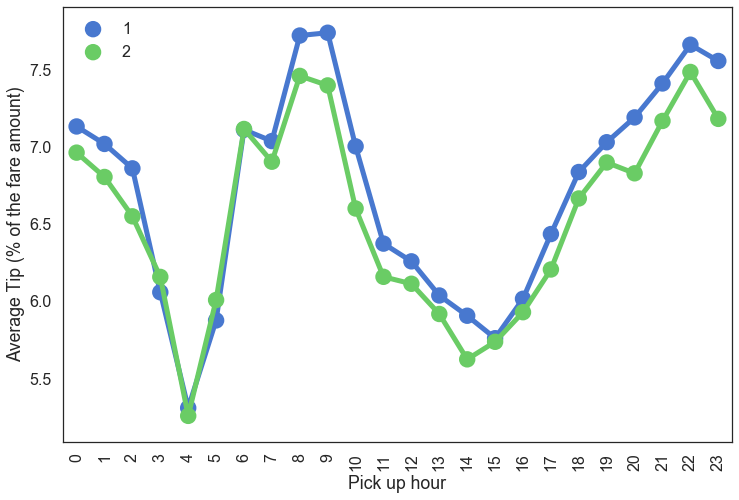

In [55]:
grouped_df = df_raw.groupby(['pickup_hour', 'VendorID'])['tip_percent'].aggregate(np.mean).reset_index() #average tip
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.pickup_hour.values, grouped_df.tip_percent.values, grouped_df.VendorID.values, alpha=0.8)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()

#### Findings:
    
Okay! Guess we don't have much too much talking to do here,
because the average tip for both the vendors is pretty much the same
    

## b) Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.
<a id="question_4b"></a>

# Predictive Model

- It is a Regression problem, because we're trying to predict a continous valued outcome (tip as a percentage of total fare)
 
- We'll be using almost all the features from our dataset. Only the following features are dropped, because they have a lot of NAN's or dispensable data -> "EHAIL_FEE", "RATECODEID", and "EXTRA"
 
- The data is split into 80% train and 20% test. We then perform 10-fold cross validation on our data 
 
- I've decided to go with XGBoost and LightGBM to build this regression model. LightGBM is a gradient boosting framework that use tree based learning algorithm. Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results.

In [218]:
import xgboost as xgb # please install xgboost before running this script.
import lightgbm as lgb # please install lightgbm before running this script.

In [220]:
df_model = df_model.reset_index() # reset the index of our dataframe. 

In [221]:
#rename our columns.
df_model = df_model.rename(columns={'index': 'ID', 'lpep_pickup_datetime': 'pickup_datetime', 'Lpep_dropoff_datetime': 'dropoff_datetime'})

In [222]:
df_model.drop(['Ehail_fee', 'RateCodeID', 'Extra'], axis=1, inplace=True) #drop these features, because they're either all 0's or Nan's

In [223]:
display_data(df_model.tail()) # let's see how our data looks like. The ID field is helpful during the prediction stage

,ID,VendorID,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
1494921,1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,-73.925339,40.761776,-73.786606,40.770184,1,10.6,30.5,0.5,0.00,0.0,0.3,31.80,2,1.0
1494922,1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,-73.974312,40.685802,-73.980591,40.664055,1,1.8,8.0,0.5,0.00,0.0,0.3,9.30,2,1.0
1494923,1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,-73.996437,40.681416,-73.998283,40.662296,1,1.4,7.5,0.5,0.00,0.0,0.3,8.80,2,1.0
1494924,1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,-73.953606,40.587482,-73.941071,40.590843,1,0.8,5.0,0.5,1.25,0.0,0.3,7.55,1,1.0
1494925,1494925,1,2015-09-30 23:00:11,2015-09-30 23:05:36,N,-73.966110,40.681351,-73.955452,40.691002,1,1.4,6.5,0.5,1.00,0.0,0.3,8.80,1,1.0


In [224]:
df_model['tip_percent'] = df_model['Tip_amount']/df_model['Total_amount'] # calculate the tip percent
df_model['tip_percent'] = df_model['tip_percent'].apply(lambda x: x * 100) # multiply the value by 100
df_model = df_model[df_model['Tip_amount'] > 0] # make sure the tip is greater than zero
df_model = df_model[df_model['Fare_amount'] > 0] # make sure the fare amount is greater than zero

### Feature Correlation Analysis:

#### Let's identify correlation using a heatmap and check how the features are correlated..

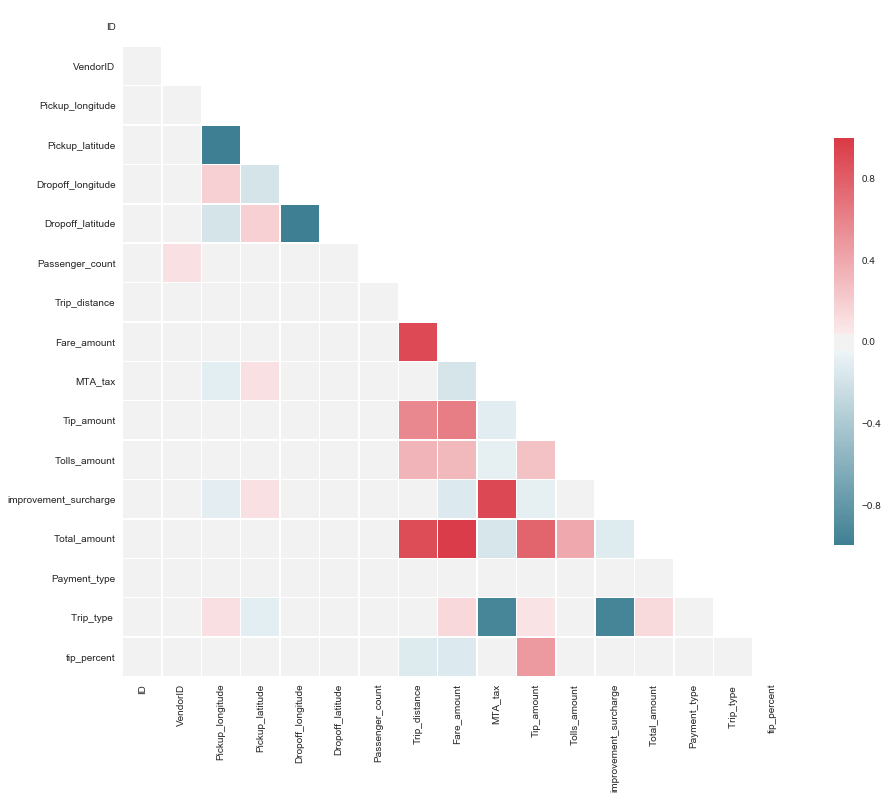

In [225]:
sns.set(style="white")

# Generate a large random dataset
temp3 = df_model.copy() # our dataframe

# Compute the correlation matrix
corr = temp3.corr() # corr calculation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Findings -

* Variables like total_amount, tolls_amount, trip_type etc are of very high importance and are all related to other variables.

* Variables like payment_type, trip_distance, pickup_longitude etc are of very less importance and are not at all related to other variables.

* Total_amount is very important => correlation is as high as 0.8

* Strong correlation is observed between different IDVs but we will be using tree based model so no need to remove those variables which are highly correlated. (though try removing for Robustness of model) - Tip_percent is slight correated with many IDVs.

#### Train-test split

In [65]:
y = df_model.tip_percent # tip_percent is our target variable
X = df_model # predictor varibles

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) # test size = 0.2, hence 80-20 split.
print ( "\nX_train:\n")
print (X_train.shape)
print ("\nX_test:\n")
print (X_test.shape)


X_train:

(482052, 20)

X_test:

(120514, 20)


In [67]:
X_train.head() # this is our training data

,ID,VendorID,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,tip_percent
554255,554255,2,2015-09-12 04:20:50,2015-09-12 04:26:38,N,-73.960762,40.694000,-73.956718,40.674175,1,1.56,7.0,0.5,2.08,0.0,0.3,10.38,1,1.0,20.038536
1038042,1038042,1,2015-09-21 10:05:28,2015-09-21 10:35:19,N,-73.939056,40.805336,-73.949432,40.781075,1,2.00,18.5,0.5,5.75,0.0,0.3,25.05,1,1.0,22.954092
1483457,1483457,2,2015-09-30 19:02:53,2015-09-30 19:07:34,N,-73.996300,40.682655,-73.985229,40.674343,2,1.00,5.5,0.5,1.46,0.0,0.3,8.76,1,1.0,16.666667
922927,922927,2,2015-09-19 11:55:29,2015-09-19 12:09:21,N,-73.954781,40.720467,-73.964806,40.683136,1,3.38,12.5,0.5,3.32,0.0,0.3,16.62,1,1.0,19.975933
144749,144749,2,2015-09-04 09:20:48,2015-09-04 09:28:48,N,-73.961288,40.694057,-73.983376,40.693851,1,1.16,7.0,0.5,1.56,0.0,0.3,9.36,1,1.0,16.666667


In [68]:
X_test = X_test.iloc[:, :-1] # exclude the target variable(tip_percent) from our test data

In [69]:
X_test.shape # test data shape

(120514, 19)

In [70]:
X_test.head() # test data

,ID,VendorID,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
884770,884770,2,2015-09-18 20:56:28,2015-09-18 21:12:14,N,-73.961067,40.806664,-73.937531,40.801205,1,2.18,11.5,0.5,2.56,0.0,0.3,15.36,1,1.0
495784,495784,2,2015-09-11 09:00:53,2015-09-11 09:34:41,N,-73.995850,40.696995,-73.954041,40.766575,3,7.68,28.5,0.5,5.86,0.0,0.3,35.16,1,1.0
1045714,1045714,2,2015-09-21 15:23:27,2015-09-21 15:33:47,N,-73.952957,40.823215,-73.962753,40.804356,1,1.59,9.0,0.5,1.20,0.0,0.3,11.00,1,1.0
1284561,1284561,2,2015-09-26 18:17:07,2015-09-26 18:31:12,N,-73.952950,40.727428,-73.919464,40.744488,1,2.56,11.5,0.5,2.46,0.0,0.3,14.76,1,1.0
674626,674626,2,2015-09-14 10:04:14,2015-09-14 10:07:11,N,-73.979980,40.665253,-73.974510,40.671356,1,0.52,4.0,0.5,1.20,0.0,0.3,6.00,1,1.0


In [71]:
X_test.drop(['Tip_amount'], axis=1, inplace=True) 
# it's also necessary to drop the tip_amount, because then it'd be easy for the model to identify the percentage 
# of tip by just dividing it with the total fare.

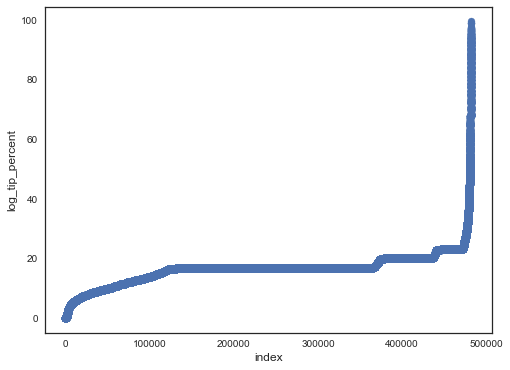

In [72]:
X_train['log_tip_percent'] = np.log1p(X_train['tip_percent'].values) # logarithm of the tip_percent, because we use RMSLE

plt.figure(figsize=(8,6))
plt.scatter(range(X_train.shape[0]), np.sort(X_train.tip_percent.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('log_tip_percent', fontsize=12)
plt.show()

### Check to see if there are any null values in the data.

In [73]:
null_count_df = X_train.isnull().sum(axis=0).reset_index() # training set
null_count_df.columns = ['col_name', 'null_count']
null_count_df

,col_name,null_count
0,ID,0
1,VendorID,0
2,pickup_datetime,0
3,dropoff_datetime,0
4,Store_and_fwd_flag,0
5,Pickup_longitude,0
6,Pickup_latitude,0
7,Dropoff_longitude,0
8,Dropoff_latitude,0
9,Passenger_count,0


In [74]:
null_count_df = X_test.isnull().sum(axis=0).reset_index() # test set
null_count_df.columns = ['col_name', 'null_count']
null_count_df

,col_name,null_count
0,ID,0
1,VendorID,0
2,pickup_datetime,0
3,dropoff_datetime,0
4,Store_and_fwd_flag,0
5,Pickup_longitude,0
6,Pickup_latitude,0
7,Dropoff_longitude,0
8,Dropoff_latitude,0
9,Passenger_count,0


#### Great! There are no missing values.

### Validation Strategy:

* Validation strategy is very important because without a proper validation starategy, it will be very hard to evaluate the models against each other.

* Since dates are given as part of the dataset, it is essential to check whether the train and test datasets are from the same time period or different time period.

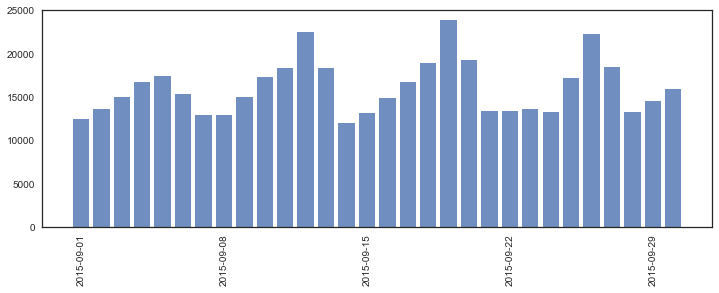

In [75]:
X_train['pickup_date'] = X_train['pickup_datetime'].dt.date
X_test['pickup_date'] = X_test['pickup_datetime'].dt.date

cnt_srs = X_train['pickup_date'].value_counts() # train pickup date
plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

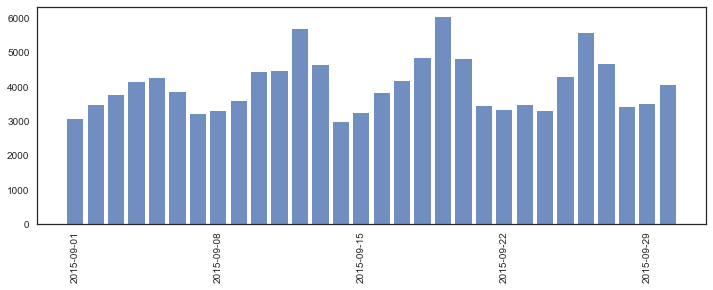

In [76]:
cnt_srs = X_test['pickup_date'].value_counts() # test pickup date
plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

### Findings: 

* Awesome. The distributions are very similar and so we could potentially use the K-fold cross validation for our dataset. Please note that if the train and test datasets are from different time frames, we'd have to use time based validation.

## Baseline Model:

* Now that we have got an idea about the dataset, let us buid a baseline model using xgboost and check the     performance.


* We could create few basic variables from datetime column and convert the store_and_forward_flag to numeric.


In [77]:
# day of the month 
X_train['pickup_day'] = X_train['pickup_datetime'].dt.day
X_test['pickup_day'] = X_test['pickup_datetime'].dt.day

# month of the year 
X_train['pickup_month'] = X_train['pickup_datetime'].dt.month
X_test['pickup_month'] = X_test['pickup_datetime'].dt.month

# hour of the day 
X_train['pickup_hour'] = X_train['pickup_datetime'].dt.hour
X_test['pickup_hour'] = X_test['pickup_datetime'].dt.hour

# Week of year 
X_train["week_of_year"] = X_train["pickup_datetime"].dt.weekofyear
X_test["week_of_year"] = X_test["pickup_datetime"].dt.weekofyear

# Day of week 
X_train["day_of_week"] = X_train["pickup_datetime"].dt.weekday
X_test["day_of_week"] = X_test["pickup_datetime"].dt.weekday

# Convert to numeric 
map_dict = {'N':0, 'Y':1}
X_train['Store_and_fwd_flag'] = X_train['Store_and_fwd_flag'].map(map_dict)
X_test['Store_and_fwd_flag'] = X_test['Store_and_fwd_flag'].map(map_dict)

In [111]:
# drop off the variables which are not needed 
cols_to_drop = ['ID', 'pickup_datetime', 'pickup_date', 'dropoff_datetime']
train_id = X_train['ID'].values
test_id = X_test['ID'].values
train_y = X_train.log_tip_percent.values
train_X = X_train.drop(cols_to_drop + ['Tip_amount', 'tip_percent', 'log_tip_percent'], axis=1)
test_X = X_test.drop(cols_to_drop, axis=1)

### LightGBM v/s other tree-based algorithms: Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

#### Let us write a helper function to run the xgboost model and light gbm model.

In [117]:
def runXGB(train_X, train_y, val_X, val_y, test_X, eta=0.05, max_depth=5, min_child_weight=1, subsample=0.8, colsample=0.7, num_rounds=8000, early_stopping_rounds=100, seed_val=2017):
    params = {}
    params["objective"] = "reg:linear"
    params['eval_metric'] = "rmse"
    params["eta"] = eta
    params["min_child_weight"] = min_child_weight
    params["subsample"] = subsample
    params["colsample_bytree"] = colsample
    params["silent"] = 1
    params["max_depth"] = max_depth
    params["seed"] = seed_val
    params["nthread"] = -1

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xgval = xgb.DMatrix(val_X, label = val_y)
    xgtest = xgb.DMatrix(test_X)
    watchlist = [ (xgtrain,'train'), (xgval, 'test') ]
    model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=20)

    pred_val = model.predict(xgval, ntree_limit=model.best_ntree_limit)
    pred_test = model.predict(xgtest, ntree_limit=model.best_ntree_limit)

    return pred_val, pred_test

def runLGB(train_X, train_y, val_X, val_y, test_X, eta=0.05, num_leaves=10, max_depth=5, min_child_weight=1, subsample=0.8, colsample=0.7, num_rounds=8000, early_stopping_rounds=100, seed_val=2017):
    params = {}
    params["objective"] = "regression"
    params['metric'] = "l2_root"
    params["learning_rate"] = eta
    params["min_child_weight"] = min_child_weight
    params["bagging_fraction"] = subsample
    params["bagging_seed"] = seed_val
    params["feature_fraction"] = colsample
    params["verbosity"] = 0
    params["max_depth"] = max_depth
    params["num_leaves"] = num_leaves
    params["nthread"] = -1

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label = val_y)
    model = lgb.train(params, lgtrain, num_rounds, valid_sets=lgval, early_stopping_rounds=early_stopping_rounds, verbose_eval=20)

    pred_val = model.predict(val_X, num_iteration=model.best_iteration)
    pred_test = model.predict(test_X, num_iteration=model.best_iteration)

    return pred_val, pred_test, model


In [80]:
from sklearn import model_selection, preprocessing, metrics # import a few other modules

In [81]:
# SKIP THIS -- NOT NECESSARY ON EVERY MACHINE -- ONLY FOR macOS---

! import os

! os.environ['KMP_DUPLICATE_LIB_OK']='True' # this is only to overcome the dependencies for the lightgbm installation.

# SKIP THIS -- NOT NECESSARY ON EVERY MACHINE -- ONLY FOR macOS----

Version: ImageMagick 7.0.5-0 Q16 x86_64 2017-02-21 http://www.imagemagick.org
Copyright: © 1999-2017 ImageMagick Studio LLC
License: http://www.imagemagick.org/script/license.php
Features: Cipher DPC HDRI Modules 
Delegates (built-in): bzlib freetype jng jpeg ltdl lzma png tiff xml zlib
Usage: import [options ...] [ file ]

Image Settings:
  -adjoin              join images into a single multi-image file
  -border              include window border in the output image
  -channel type        apply option to select image channels
  -colorspace type     alternate image colorspace
  -comment string      annotate image with comment
  -compress type       type of pixel compression when writing the image
  -define format:option
                       define one or more image format options
  -density geometry    horizontal and vertical density of the image
  -depth value         image depth
  -descend             obtain image by descending window hierarchy
  -display server      X server to c

### Now let us build the baseline model using K-fold cross validation and save the scores in a csv file so as to build ensembles / stacking models later.

### Note: Please increase the number of rounds ('num_rounds') to a high value (10000) and then run the model in local. Using just 1000 rounds here.

In [118]:
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=2017)
cv_scores = []
pred_test_full = 0
pred_val_full = np.zeros(X_train.shape[0])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.ix[dev_index], train_X.ix[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val, pred_test, model = runLGB(dev_X, dev_y, val_X, val_y, test_X, num_rounds=1000, num_leaves=10, max_depth=8, eta=0.3)
    pred_val_full[val_index] = pred_val
    pred_test_full += pred_test
    cv_scores.append(np.sqrt(metrics.mean_squared_error(val_y, pred_val)))
print(cv_scores)
print("Mean RMSE score : ",np.mean(cv_scores))

pred_test_full = pred_test_full / 5.
pred_test_full = np.expm1(pred_test_full)
pred_val_full = np.expm1(pred_val_full)

# saving train predictions for ensemble #
train_pred_df = pd.DataFrame({'ID':train_id})
train_pred_df['tip_percent'] = pred_val_full
train_pred_df.to_csv("train_preds_lgb_baseline.csv", index=False)

# saving test predictions for ensemble #
test_pred_df = pd.DataFrame({'ID':test_id})
test_pred_df['tip_percent'] = pred_test_full
test_pred_df.to_csv("test_preds_lgb_baseline.csv", index=False)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.356952
[40]	valid_0's rmse: 0.357014
[60]	valid_0's rmse: 0.357048
[80]	valid_0's rmse: 0.357093
[100]	valid_0's rmse: 0.357165
Early stopping, best iteration is:
[1]	valid_0's rmse: 0.356885
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.35785
[40]	valid_0's rmse: 0.357889
[60]	valid_0's rmse: 0.357969
[80]	valid_0's rmse: 0.358029
[100]	valid_0's rmse: 0.358095
Early stopping, best iteration is:
[6]	valid_0's rmse: 0.357826
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.357879
[40]	valid_0's rmse: 0.357917
[60]	valid_0's rmse: 0.357949
[80]	valid_0's rmse: 0.357961
[100]	valid_0's rmse: 0.358031
Early stopping, best iteration is:
[5]	valid_0's rmse: 0.357823
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.35366
[40]	valid_0's rmse: 0.353699
[60]	valid_0's rmse: 0.35375
[80]	valid_0's r

### Great! Our LightGBM model gave us a RMSE score of 0.35. Wait, what does that mean? What's RMSE? Why are we using it here?

* What is RMSE: "A well-fitting regression model results in predicted values close to the observed data values. The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values."


* What is a good score: Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.


* Is 0.35 is a great RMSE score? Well, it depends. I'd say it's pretty decent, but it can be improved by tuning our hyperparameters (learning_rate, max_depth, max_bins, num_leaves etc..), performing some feature engineering to create a better set of predictor variables, ensembling/stacking our tree models.

#### Let's plot the most feature importance chart to identify the features which were really useful in our prediction step.

Plot feature importances...


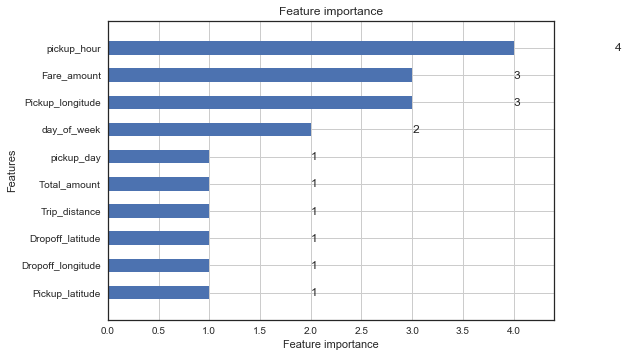

In [131]:
print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=10, height = 0.5)
plt.show()

## Question 5

Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.

### •             Option A: Distributions

•             Build a derived variable representing the average speed over the course of a trip.

•             Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

•             Can you build up a hypothesis of average trip speed as a function of time of day?

<a id="question_5"></a>

In [132]:
df_raw.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,pickup_hour,dropoff,dropoff_hour,day_of_week,Airport,pick_lat_new,drop_lat_new,pick_lon_new,drop_lon_new,tip_percent
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0,2015-09-01 00:02:38,0,1,NOT,849,850,705,705,20.00000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0,2015-09-01 00:04:24,0,1,NOT,3122,3122,392,392,0.00000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0,2015-09-01 00:04:24,0,1,NOT,1667,1646,1285,1355,8.62069
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0,2015-09-01 00:06:42,0,1,NOT,1666,1715,1286,1185,0.00000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0,2015-09-01 00:04:20,0,1,NOT,1140,1147,945,1055,0.00000


In [133]:
ans_t = (df_raw['dropoff'] - df_raw['pickup']).apply(lambda x: x.total_seconds()) # extract the seconds from pickup data

In [134]:
print('Percentage of entries with travel time less than a minute: ',100 * df[ans_t < 60].shape[0]/df.shape[0],'%')

Percentage of entries with travel time less than a minute:  10.0 %


#### Trips taking less than 60 seconds are slightly hard to be true, hence we omit these entries as they could harm our analysis. There are ~150000 such entries i.e. 10% of the entire data, hence we can proceed after dropping this part.

#### a) Build a derived variable representing the average speed over the course of a trip.

In [135]:
df_raw['travel_time'] = (df_raw['dropoff'] - df_raw['pickup']).apply(lambda x: x.total_seconds()) 
df_raw = df_raw[df_raw['travel_time'] > 60] # travel time greater than 60 seconds
df_raw['average_speed'] = 3600*(df_raw['Trip_distance']/df_raw['travel_time'])

In [137]:
df_raw['average_speed'].plot.hist(bins=10)

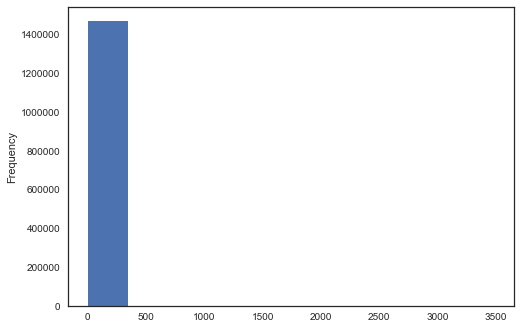

In [138]:
plt.show()

In [139]:
print('No of entries with average speed over 100 miles per hour: ',(df_raw['average_speed']>100).value_counts()[1])
df_raw = df_raw[df_raw['average_speed']<100]

No of entries with average speed over 100 miles per hour:  218


#### We filter away the 218 entries with over 100 miles per hour of average speed as it is unreasonable and must have been a result of some erroneous data collection process or later in the pipeline.

#### b) Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

In [140]:
df_raw['week'] = df_raw['dropoff'].apply(lambda x: x.week) # extract week of year

In [141]:
df_raw['week'].value_counts() # week count

37    357931
38    353998
39    333341
36    293197
40    130704
Name: week, dtype: int64

In [143]:
week_1 = df_raw['average_speed'][df_raw['week']==36].as_matrix() # reassign week=36 to week_1 df
week_2 = df_raw['average_speed'][df_raw['week']==37].as_matrix() # reassign week=37 to week_2 df
week_3 = df_raw['average_speed'][df_raw['week']==38].as_matrix() # reassign week=38 to week_3 df
week_4 = df_raw['average_speed'][df_raw['week']==39].as_matrix() # reassign week=39 to week_4 df
week_5 = df_raw['average_speed'][df_raw['week']==40].as_matrix() # reassign week=40 to week_5 df

In [144]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=1072.2723118680258, pvalue=0.0)

#### Hypotheses test: The ANOVA test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we conclude that the differences between the groups are statistically significant which implies that the week of the month does seem to be related to the average speed. We further compute the mean, median and histogram for these groups to support our claims.

In [145]:
print(week_1.mean(),week_2.mean(),week_3.mean(),week_4.mean(),week_5.mean())

13.3725384143 12.71080895 12.701090265 13.1788085635 12.4564536034


In [146]:
print(statistics.median(week_1),statistics.median(week_2),statistics.median(week_3),statistics.median(week_4),
      statistics.median(week_5))

12.1277831559 11.6164383562 11.6383561644 12.028436019 11.4210526316


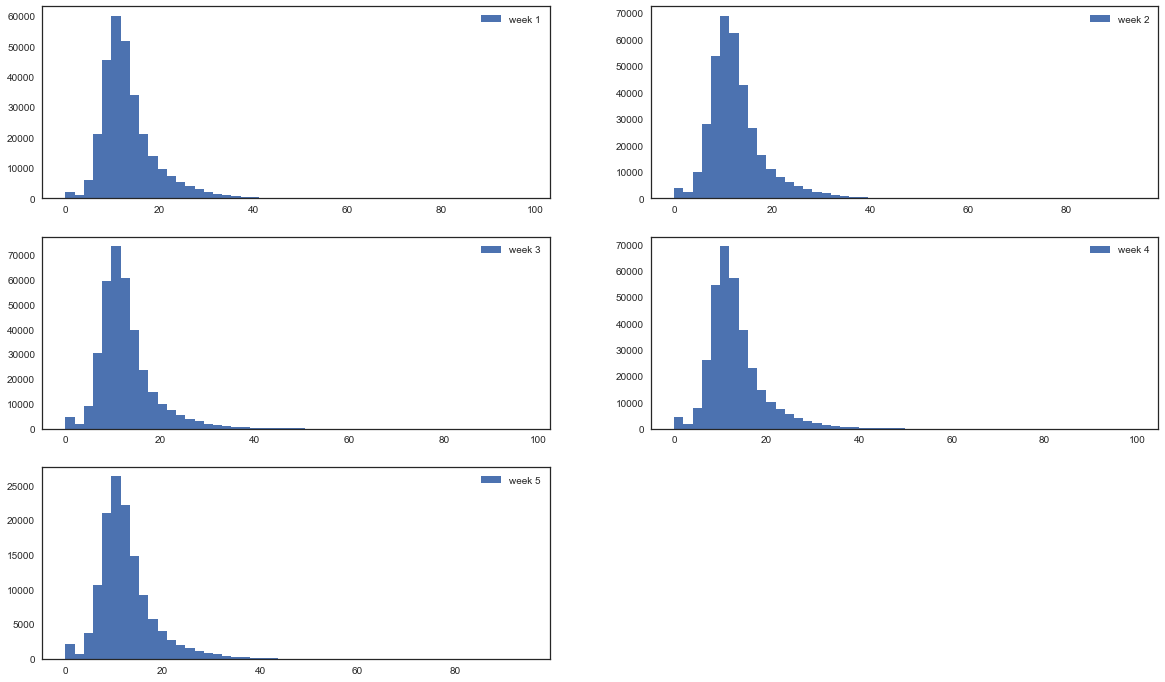

In [147]:
plt.rcParams["figure.figsize"] = [20,12]
plt.subplot(3,2,1)
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.subplot(3,2,2)
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.subplot(3,2,3)
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.subplot(3,2,4)
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.subplot(3,2,5)
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.legend()
plt.savefig('task5')
plt.show()

In [148]:
grouped = df_raw.groupby('pickup_hour') # group by the hour
samples = []

for name,group in grouped:
    samples.append(group['average_speed']) # append the avg speed data

In [149]:
sample = samples
stats.f_oneway(sample[0],sample[1],sample[2],sample[3], sample[4],sample[5],sample[6],sample[7],sample[8],sample[9],
              sample[10],sample[11],sample[12],sample[13],sample[14],sample[15],sample[16],sample[17],sample[18],
               sample[19],
              sample[20],sample[21],sample[22],sample[23])

F_onewayResult(statistic=5115.1924680795482, pvalue=0.0)

#### Hpotheses test: The ANOVA test for sets partitioned as per the hour of the journey also gives a high f-value and p-value of 0, implying that there are statistifically significant differences in the data sets considered.

In [150]:
means = [] # empty list for storing the mean info
medians = [] # empty list for storing the median info
for hour in range(24):
    means.append(statistics.mean(sample[hour]))
    print('Mean:',statistics.mean(sample[hour]))
    medians.append(statistics.median(sample[hour]))
    print('Median:',statistics.median(sample[hour]))

Mean: 14.6495861622
Median: 13.4175152749
Mean: 14.9026654218
Median: 13.7275247779
Mean: 15.1285865108
Median: 13.9655172414
Mean: 15.5321240485
Median: 14.2238515637
Mean: 16.3474706119
Median: 14.6586826347
Mean: 18.1238727506
Median: 16.1920793221
Mean: 17.1669571131
Median: 15.3365853659
Mean: 13.522829176
Median: 12.053855605
Mean: 12.2939068106
Median: 11.0204081633
Mean: 12.5725108899
Median: 11.3277442236
Mean: 12.5722718836
Median: 11.36
Mean: 12.285535187
Median: 11.1065200506
Mean: 12.1964183478
Median: 11.0277003877
Mean: 12.0909700355
Median: 10.9636363636
Mean: 11.5932065475
Median: 10.580279663
Mean: 11.2097823832
Median: 10.3104710707
Mean: 10.9790454707
Median: 10.1704035874
Mean: 10.9486918229
Median: 10.224852071
Mean: 11.5439596211
Median: 10.7539118065
Mean: 12.0926872866
Median: 11.2322070453
Mean: 12.7872698155
Median: 11.8222222222
Mean: 13.6557388427
Median: 12.4897959184
Mean: 14.1263105715
Median: 12.932038835
Mean: 14.4068874199
Median: 13.2046332046


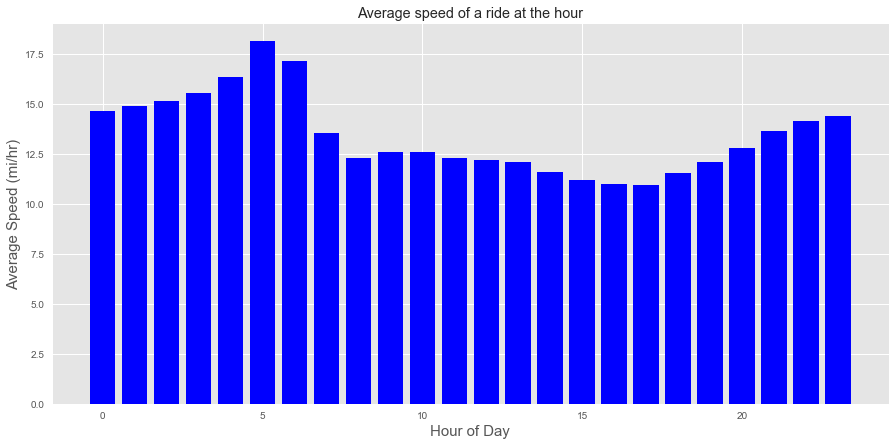

In [210]:
plt.style.use('ggplot')

plt.bar(index, means, color='blue')
plt.xlabel("Hour of Day", fontsize = 15)
plt.ylabel("Average Speed (mi/hr)", fontsize = 15)
plt.title("Average speed of a ride at the hour")

plt.show()

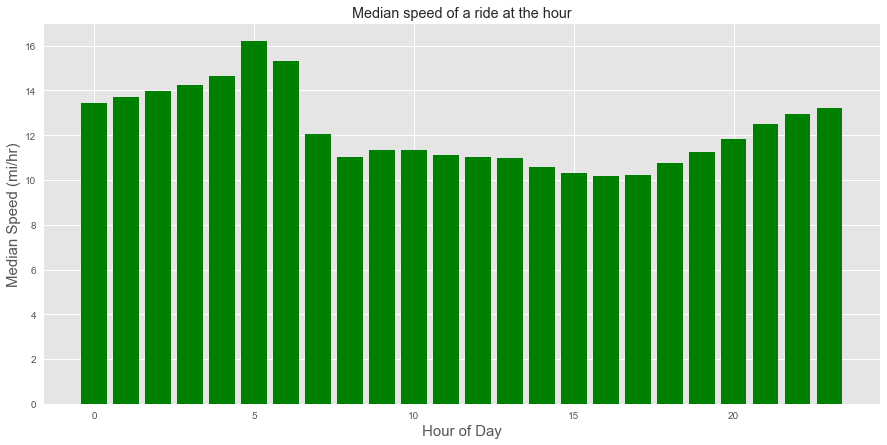

In [211]:
plt.style.use('ggplot')

plt.bar(index, medians, color='green')
plt.xlabel("Hour of Day", fontsize = 15)
plt.ylabel("Median Speed (mi/hr)", fontsize = 15)
plt.title("Median speed of a ride at the hour")

plt.show()

#### Findings: Looks like the average speed is higher during the morning hours(4-6 AM). Maybe be because of very little traffic.